### 1.Business problem understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

In [2]:
df = pd.read_excel("data.xlsx")
df.head()

,Moisture,rainfall,Average Humidity,Mean Temp,max Temp,Min temp,alkaline,sandy,chalky,clay,millet yield,Outcomes
0,12.801685,0.012360,57,62,71,52,0,1,0,0,2,1
1,12.851654,0.004172,57,58,73,43,0,1,0,0,0,1
2,12.776773,0.000000,56,58,69,46,0,0,1,0,4,0
3,12.942001,0.031747,62,56,70,43,0,1,0,0,0,1
4,12.984652,0.000000,65,56,70,42,0,0,0,1,1,0


#### Dataset Understanding

In [3]:
df.describe()

,Moisture,rainfall,Average Humidity,Mean Temp,max Temp,Min temp,alkaline,sandy,chalky,clay,millet yield,Outcomes
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000
mean,12.903866,0.066509,49.601250,76.50375,89.073750,63.915000,0.343750,0.321250,0.047500,0.28750,1.711250,0.321250
std,0.099445,0.091065,18.283602,11.70657,11.183118,13.060187,0.475256,0.467249,0.212839,0.45288,1.641262,0.467249
min,12.547993,0.000000,10.000000,52.00000,60.000000,36.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,12.833139,0.000000,37.000000,68.00000,81.000000,53.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,12.910599,0.017919,49.000000,79.00000,90.000000,66.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,12.973614,0.105211,62.000000,86.00000,97.000000,75.000000,1.000000,1.000000,0.000000,1.00000,4.000000,1.000000
max,13.183391,0.369133,100.000000,102.00000,112.000000,93.000000,1.000000,1.000000,1.000000,1.00000,4.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Moisture          800 non-null    float64
 1   rainfall          800 non-null    float64
 2   Average Humidity  800 non-null    int64  
 3   Mean Temp         800 non-null    int64  
 4   max Temp          800 non-null    int64  
 5   Min temp          800 non-null    int64  
 6   alkaline          800 non-null    int64  
 7   sandy             800 non-null    int64  
 8   chalky            800 non-null    int64  
 9   clay              800 non-null    int64  
 10  millet yield      800 non-null    int64  
 11  Outcomes          800 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 75.1 KB


In [5]:
categorical = []
continuous = []
check = []

d_types = dict(df.dtypes)
for name,type in d_types.items():
    if str(type) == 'object':
        categorical.append(name)
    elif str(type) == 'float64':
        continuous.append(name)
    else:
        check.append(name)
        
print("categorical features:",categorical)
print("continuous features:",continuous)
print("features to be checked:",check)

categorical features: []
continuous features: ['Moisture', 'rainfall']
features to be checked: ['Average Humidity', 'Mean Temp', 'max Temp', 'Min temp', 'alkaline', 'sandy', 'chalky', 'clay', 'millet yield', 'Outcomes']


In [6]:
d_types = dict(df.dtypes)
for name, type in d_types.items():
    if str(type) == 'object':
        print(f"<=========={name}==========>")
        print(df[name].value_counts())

### 3.Data Preprocessing

In [7]:
df.isnull().sum()

Moisture            0
rainfall            0
Average Humidity    0
Mean Temp           0
max Temp            0
Min temp            0
alkaline            0
sandy               0
chalky              0
clay                0
millet yield        0
Outcomes            0
dtype: int64

In [8]:
df.duplicated().sum()

0

#### Train-Test-Split

In [9]:
X = df.drop("Outcomes",axis=1)
y = df["Outcomes"]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Model & Evaluation

#### Logistic Regression

In [11]:
#modeling
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

#prediction
ypred_train = lr.predict(X_train)
ypred_test = lr.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score
print("train accuracy:",accuracy_score(y_train,ypred_train))
print("test accuracy:",accuracy_score(y_test,ypred_test))

# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,X,y,cv=5)
print(scores)
print(scores.mean())

train accuracy: 1.0
test accuracy: 1.0
[1. 1. 1. 1. 1.]
1.0


#### confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[105,   0],
       [  0,  55]], dtype=int64)

### AUC

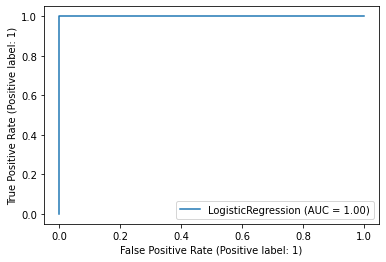

In [13]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lr,X_test,y_test)
plt.show()

### KNN

#### Feature scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
#modeling
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

#prediction
ypred_train = knn.predict(X_train)
ypred_test = knn.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score
print("train accuracy:",accuracy_score(y_train,ypred_train))
print("test accuracy:",accuracy_score(y_test,ypred_test))

# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn,X,y,cv=5)
print(scores)
scores.mean()

train accuracy: 1.0
test accuracy: 1.0
[0.64375 0.61875 0.64375 0.58125 0.6125 ]


0.6200000000000001

#### confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[105,   0],
       [  0,  55]], dtype=int64)

#### Hyperparameter tuning

In [17]:
from sklearn.model_selection import GridSearchCV

estimator = KNeighborsClassifier()
param_grid = {'n_neighbors':list(range(1,10)),'p':[1,2]}

cv_classifier = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
cv_classifier.fit(X_train,y_train)
cv_classifier.best_params_

{'n_neighbors': 1, 'p': 1}

In [18]:
#modeling
from sklearn.neighbors import KNeighborsClassifier
knn_bhp = KNeighborsClassifier(n_neighbors=1,p=1)
knn_bhp.fit(X_train,y_train)

#prediction
ypred_train = knn_bhp.predict(X_train)
ypred_test = knn_bhp.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score
print("train accuracy:",accuracy_score(y_train,ypred_train))
print("test accuracy:",accuracy_score(y_test,ypred_test))

# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_bhp,X,y,cv=5)
print("cross validation score:",scores.mean())

train accuracy: 1.0
test accuracy: 1.0
cross validation score: 0.7150000000000001


## DT

In [19]:
# decision tree classifier - with default hyperparameters
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# Prediction
pred_train = dt.predict(X_train)
base_pred = dt.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt,X,y,cv=5)
print("cross validation score:",scores.mean())

train accyracy: 1.0
test accyracy: 1.0
cross validation score: 1.0


In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,base_pred)

array([[105,   0],
       [  0,  55]], dtype=int64)

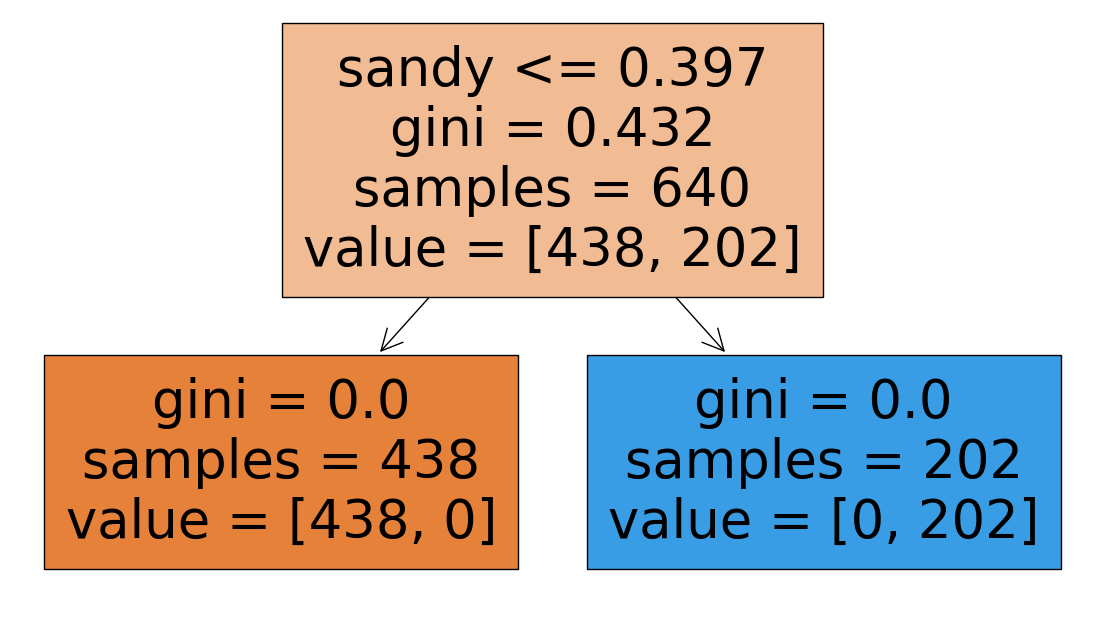

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,8),dpi=100)
plot_tree(dt,filled=True,feature_names=X.columns)
plt.show()

In [22]:
dt.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

#### Hyperparameter tuning

In [23]:
from sklearn.model_selection import GridSearchCV

#model
estimator = DecisionTreeClassifier(random_state=0)

#parameters(which you want to tune and identify the best)
param_grid = {"criterion":["gini","entropy"],
              "max_depth":[1,2,3,4]}
grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)

grid.fit(X_train,y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [24]:
# decision tree classifier - with default hyperparameters
from sklearn.tree import DecisionTreeClassifier
dt_bhp = DecisionTreeClassifier(criterion='gini',max_depth=1)
dt_bhp.fit(X_train,y_train)

# Prediction
pred_train = dt_bhp.predict(X_train)
base_pred = dt_bhp.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_bhp,X,y,cv=5)
print("cross validation score:",scores.mean())

train accyracy: 1.0
test accyracy: 1.0
cross validation score: 1.0


In [25]:
def report_model(model):
    model.fit(X_train,y_train)
    model_preds = model.predict(X_test)
    pred_train = model.predict(X_train)
    print("train accyracy:",accuracy_score(pred_train,y_train))
    print("test accyracy:",accuracy_score(model_preds,y_test))
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns)

#### Pruning

train accyracy: 1.0
test accyracy: 1.0


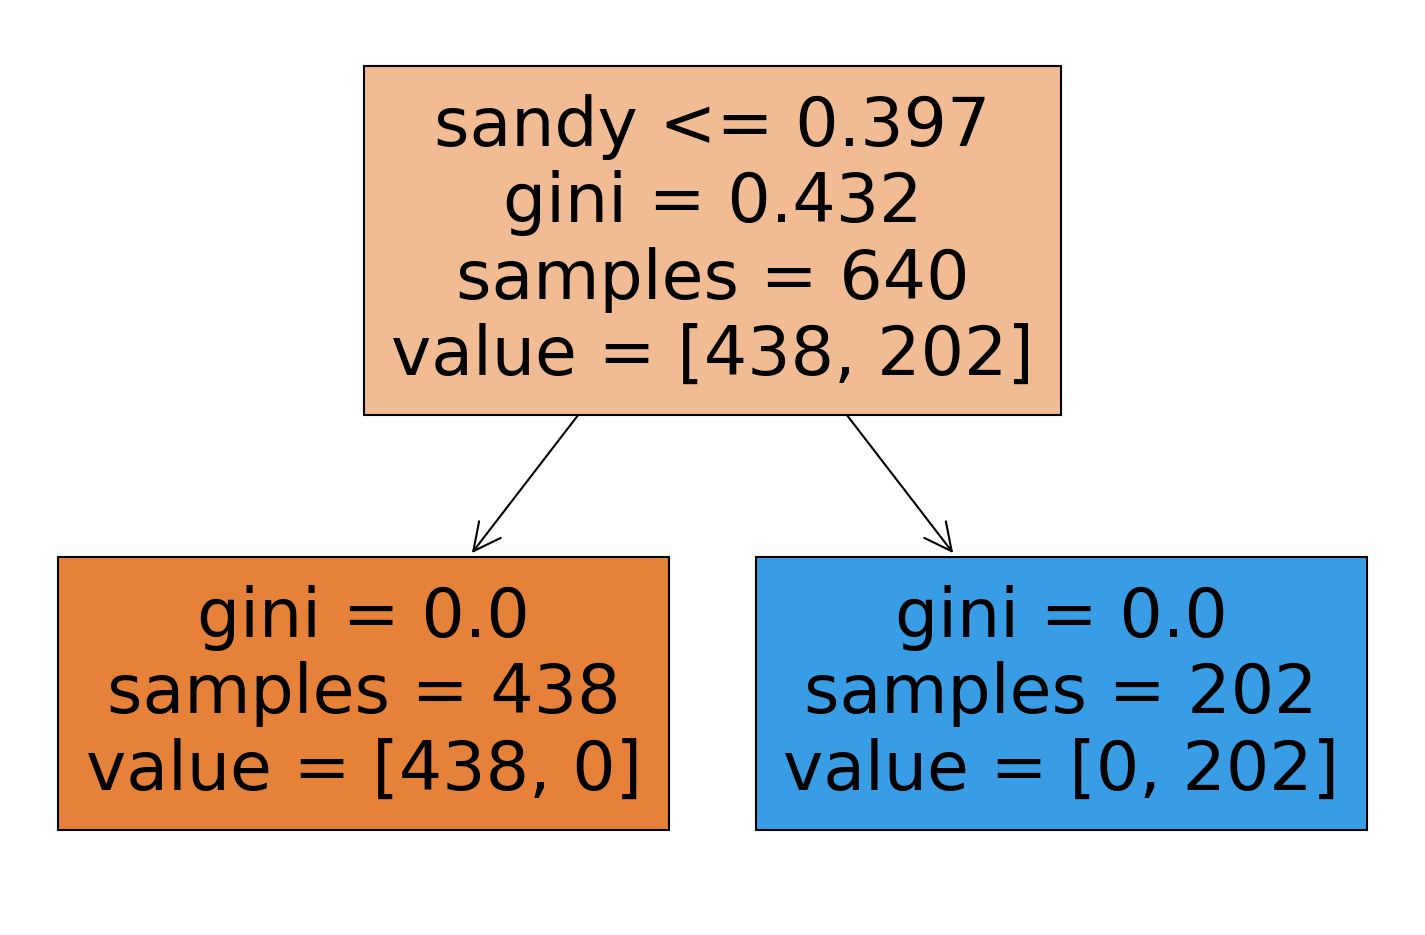

In [26]:
pruned_tree = DecisionTreeClassifier(max_depth=3)
report_model(pruned_tree)

train accyracy: 1.0
test accyracy: 1.0


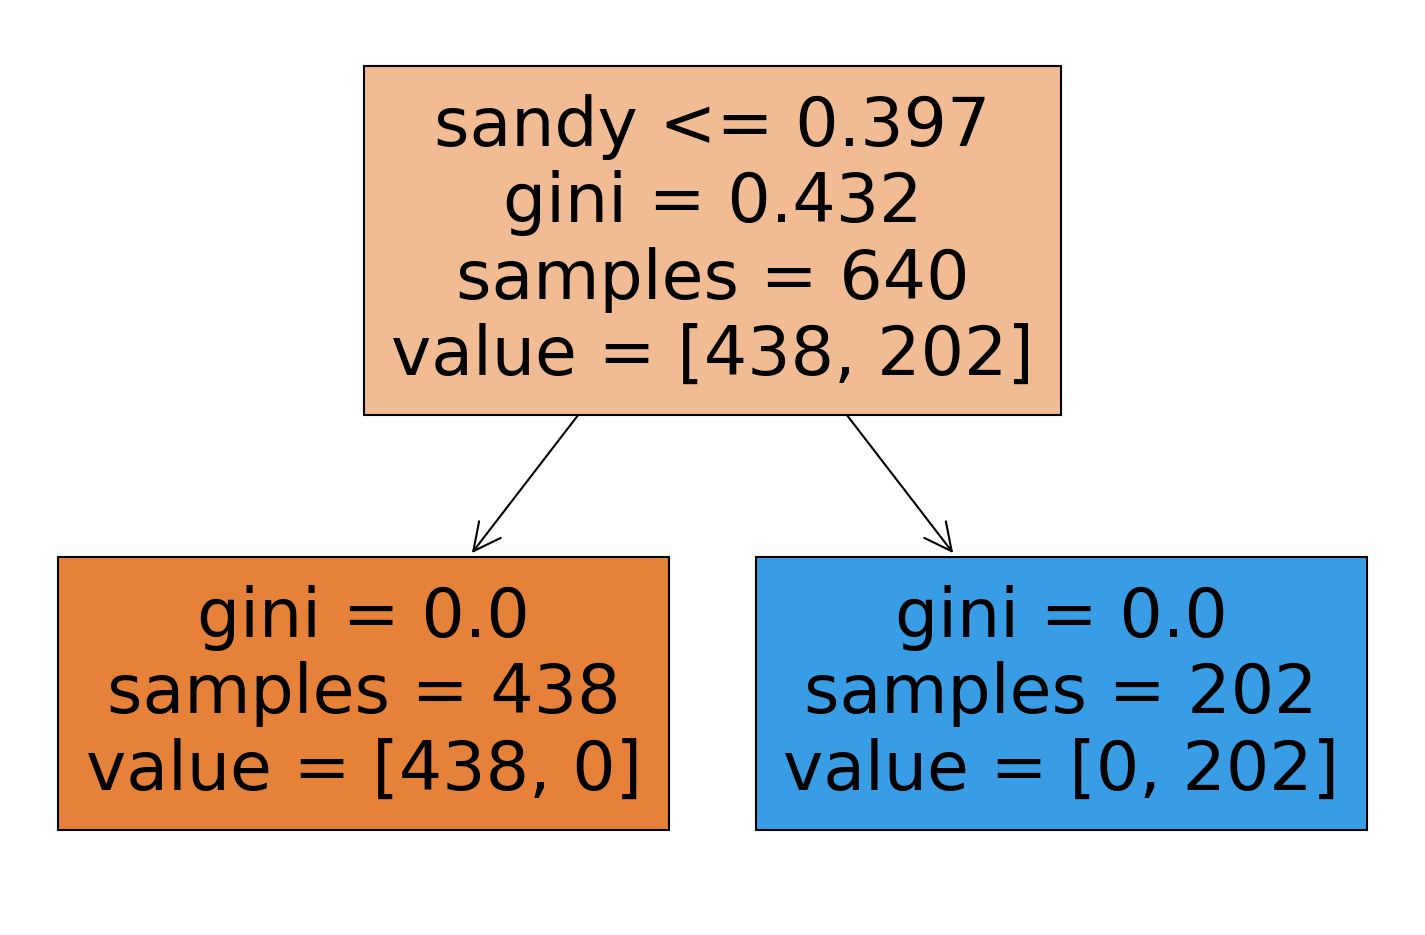

In [27]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes = 3)
report_model(pruned_tree)

## Rando Forest

In [28]:
# RandomForestClassifier - with default hyperparameters
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# Prediction
pred_train = rf.predict(X_train)
base_pred = rf.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf,X,y,cv=5)
print("cross validation score:",scores.mean())

train accyracy: 1.0
test accyracy: 1.0
cross validation score: 1.0


In [29]:
confusion_matrix(y_test,base_pred)

array([[105,   0],
       [  0,  55]], dtype=int64)

In [30]:
rf.feature_importances_

array([0.00571868, 0.00526763, 0.01205318, 0.00428942, 0.00399132,
       0.00346456, 0.12602132, 0.64706469, 0.02493745, 0.11950863,
       0.04768312])

#### Hyperparameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV

#model
estimator = RandomForestClassifier(random_state=0)

#parameters(which you want to tune and identify the best)
param_grid = {'n_estimators':list(range(1,10))}
grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)

grid.fit(X_train,y_train)

grid.best_params_

{'n_estimators': 1}

In [32]:
# RandomForestClassifier - with hyper hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
rf_bhp = RandomForestClassifier(n_estimators=1)
rf_bhp.fit(X_train,y_train)

# Prediction
pred_train = rf_bhp.predict(X_train)
base_pred = rf_bhp.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_bhp,X,y,cv=5)
print("cross validation score:",scores.mean())

train accyracy: 1.0
test accyracy: 1.0
cross validation score: 0.9949999999999999


### Ada boost

In [33]:
# AdaBoost classifier with default parameters
from sklearn.ensemble import AdaBoostClassifier
Ad_default = AdaBoostClassifier()
Ad_default.fit(X_train,y_train)

# Prediction
pred_train = Ad_default.predict(X_train)
base_pred = Ad_default.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Ad_default,X,y,cv=5)
print("cross validation score:",scores.mean())

train accyracy: 1.0
test accyracy: 1.0
cross validation score: 1.0


In [34]:
Ad_default.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [35]:
confusion_matrix(y_test,base_pred)

array([[105,   0],
       [  0,  55]], dtype=int64)

In [36]:
grid.best_estimator_

RandomForestClassifier(n_estimators=1, random_state=0)

In [37]:
grid.best_estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.60687178, 0.        , 0.21663443, 0.17649379,
       0.        ])

In [38]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                     index=X.columns,
                     columns=['Importance'])
important_features = feats[feats['Importance']>0.1]
important_features

,Importance
alkaline,0.606872
chalky,0.216634
clay,0.176494


In [39]:
imp_features_list=feats[feats['Importance']>0.1].index.to_list()
imp_features_list

['alkaline', 'chalky', 'clay']

#### Hyperparameter tuning

In [40]:
from sklearn.model_selection import GridSearchCV

#model
estimator = AdaBoostClassifier(random_state=0)

#parameters(which you want to tune and identify the best)
param_grid = {'n_estimators':list(range(1,30))}
grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)

grid.fit(X_train,y_train)

grid.best_params_

{'n_estimators': 1}

In [41]:
X_imp = X[imp_features_list]  #dropped unimportant
y = df['Outcomes']


Ada_bhp = AdaBoostClassifier(n_estimators=25)
Ada_bhp.fit(X_train,y_train)

# Prediction
pred_train = Ada_bhp.predict(X_train)
base_pred = Ada_bhp.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Ada_bhp,X,y,cv=5)
print("cross validation score:",scores.mean())

train accyracy: 1.0
test accyracy: 1.0
cross validation score: 1.0


## Gradient boosting

In [42]:
# gradient boosting classifier with default parameters
from sklearn.ensemble import GradientBoostingClassifier
gb_default = GradientBoostingClassifier()
gb_default.fit(X_train,y_train)


# Prediction
pred_train = gb_default.predict(X_train)
pred_test = gb_default.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(pred_test,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gb_default,X,y,cv=5)
print("cross validation score:",scores.mean())

train accyracy: 1.0
test accyracy: 1.0
cross validation score: 1.0


#### Hyperparameter tuning

In [43]:
from sklearn.model_selection import GridSearchCV

#model
estimator = GradientBoostingClassifier(random_state=0)

#parameters(which you want to tune and identify the best)
param_grid = {'n_estimators':list(range(1,25))}
grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)

grid.fit(X_train,y_train)

grid.best_params_

{'n_estimators': 3}

In [44]:

gb_default = GradientBoostingClassifier(n_estimators=3)
gb_default.fit(X_train,y_train)


# Prediction
pred_train = gb_default.predict(X_train)
base_pred = gb_default.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gb_default,X,y,cv=5)
print("cross validation score:",scores.mean())

train accyracy: 1.0
test accyracy: 1.0
cross validation score: 1.0


## XG Boost

In [45]:
# XG Boost classifier with default parameters
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

# Prediction
pred_train = xgb.predict(X_train)
base_pred = xgb.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb,X,y,cv=5)
print("cross validation score:",scores.mean())
    

train accyracy: 1.0
test accyracy: 1.0
cross validation score: 1.0


In [46]:
confusion_matrix(y_test,base_pred)

array([[105,   0],
       [  0,  55]], dtype=int64)

In [47]:
feats = pd.DataFrame(data=grid.best_estimator_.feature_importances_,
                     index=X.columns,
                     columns=['Importance'])
important_features = feats[feats['Importance']>0.01]
important_features

,Importance
sandy,1.0


#### Hyperparameter tuning

In [49]:
from sklearn.model_selection import GridSearchCV

#model
estimator = XGBClassifier()

#parameters(which you want to tune and identify the best)
param_grid = {'n_estimators':list(range(1,10)),
              'max_depth':list(range(1,10)),
              'gamma':list(range(0,1))}
grid = GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)

grid.fit(X_train,y_train)

grid.best_params_

{'gamma': 0, 'max_depth': 1, 'n_estimators': 1}

In [50]:
X_imp = X[imp_features_list]  #dropped unimportant
y = df['Outcomes']

xgb_bhp = GradientBoostingClassifier()
xgb_bhp.fit(X_train,y_train)


# Prediction
pred_train = xgb_bhp.predict(X_train)
base_pred = xgb_bhp.predict(X_test)

# Evaluation

# 1.train & test acuuracy
from sklearn.metrics import accuracy_score
print("train accyracy:",accuracy_score(pred_train,y_train))
print("test accyracy:",accuracy_score(base_pred,y_test))

# 2.cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb_bhp,X,y,cv=5)
print("cross validation score:",scores.mean())

train accyracy: 1.0
test accyracy: 1.0
cross validation score: 1.0


### SVM

In [51]:
#modeling
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

#prediction
ypred_train = svm.predict(X_train)
ypred_test = svm.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score
print("train accuracy:",accuracy_score(y_train,ypred_train))
print("test accuracy:",accuracy_score(y_test,ypred_test))

# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm,X,y,cv=5)
print(scores)
print("cross validation:",scores.mean())

train accuracy: 1.0
test accuracy: 1.0
[0.675   0.675   0.68125 0.68125 0.68125]
cross validation: 0.67875


#### Hyperparameter tuning

In [52]:
from sklearn.model_selection import GridSearchCV

estimator = SVC()

param_grid = {'kernel':['linear','rbf','sigmoid','poly']}

grid = GridSearchCV(estimator,param_grid,cv=5)
grid.fit(X,y)
grid.best_params_

{'kernel': 'linear'}

In [53]:
#modeling
from sklearn.svm import SVC
svm_bhp = SVC(kernel='linear')
svm_bhp.fit(X_train,y_train)

#prediction
ypred_train = svm_bhp.predict(X_train)
ypred_test = svm_bhp.predict(X_test)

#evaluation
from sklearn.metrics import accuracy_score
print("train accuracy:",accuracy_score(y_train,ypred_train))
print("test accuracy:",accuracy_score(y_test,ypred_test))

# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_bhp,X,y,cv=5)
print(scores)
print("cross validation:",scores.mean())

train accuracy: 1.0
test accuracy: 1.0
[1. 1. 1. 1. 1.]
cross validation: 1.0
